In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/content/Titanic_train.csv")
test = pd.read_csv("/content/Titanic_test.csv")

In [3]:
data = pd.concat([train, test], axis = 0)

# EDA

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


**Cabin has too much missing values, so it is best to drop it.**

In [6]:
data.drop(['Cabin'], axis = 1, inplace = True)

In [8]:
# Calculate the mode of the column
mode_value = data['Survived'].mode()[0]

# Fill missing values with the mode
data['Survived'].fillna(mode_value, inplace=True)
data['Survived'] = data['Survived'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [9]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [10]:
mode_value = data['Embarked'].mode()[0]  # Get the mode (most frequent value)
data['Embarked'].fillna(mode_value, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


# EDA

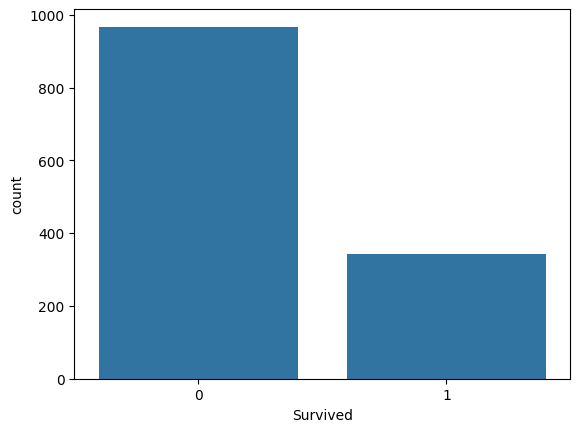

In [14]:
sns.countplot(x='Survived', data=data)
plt.show()

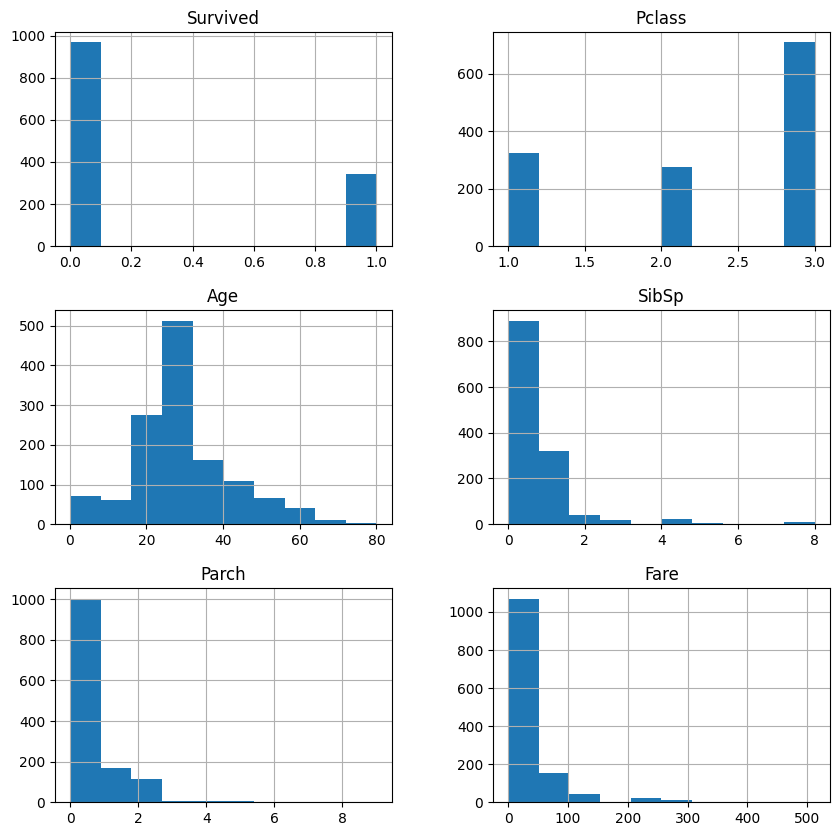

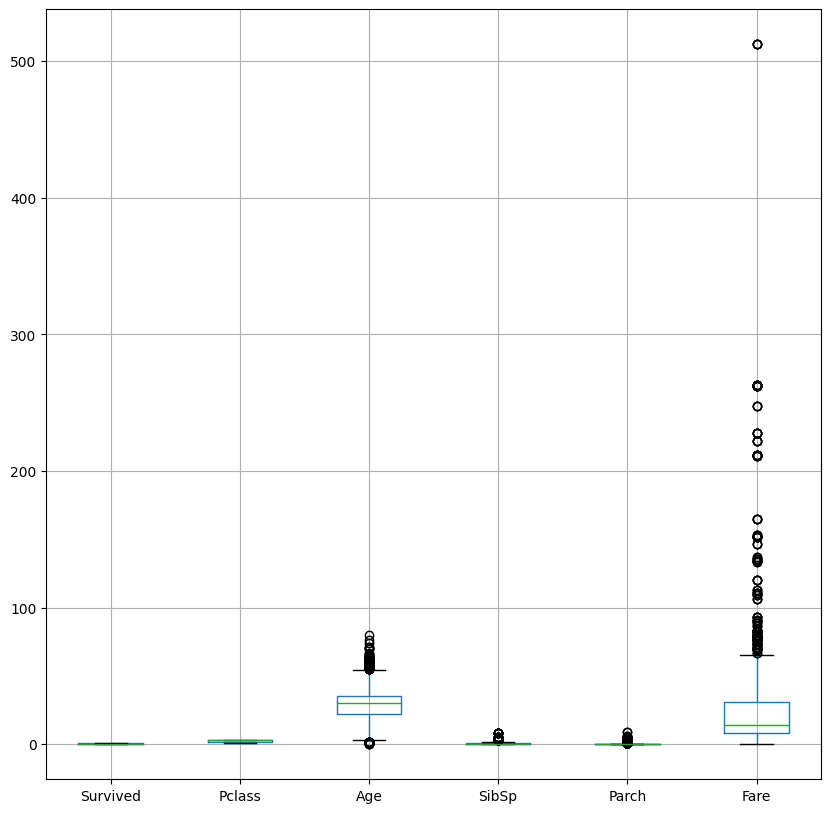

In [15]:
# histograms
data.hist(figsize=(10,10))
plt.show()

# boxplots
data.boxplot(figsize=(10,10))
plt.show()

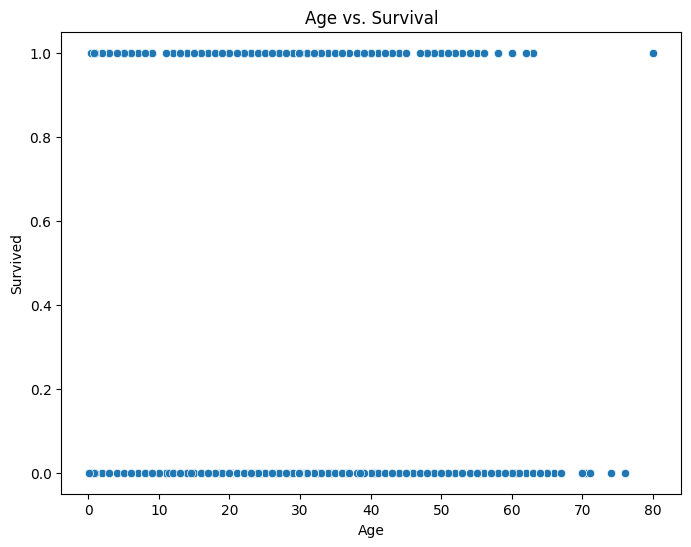

In [16]:
# Scatter plot for Age vs. Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Survived', data=data)
plt.title('Age vs. Survival')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# XGBM

In [19]:
y = data['Survived']
x = data.drop(['Survived'], axis = 1)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
!pip install Xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, gamma= 100, alpha = 0.1)
xgb.fit(x_train, y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=100, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [27]:
#Predict on the training and testing sets
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)


In [29]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.7430754536771729
Testing Accuracy: 0.7213740458015268


**CROSS VALIDATION**

In [31]:

from sklearn.model_selection import cross_val_score
# Perform cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(xgb, x, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", average_cv_score)


Cross-Validation Scores: [0.74045802 0.74045802 0.73664122 0.73664122 0.7394636 ]
Average Cross-Validation Score: 0.738732414963002


# LGBM

In [33]:
import lightgbm as lgb

# Create LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [35]:
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015


In [36]:
y_pred_train = bst.predict(x_train)
y_pred_test = bst.predict(x_test)

In [37]:
# Convert probabilities to binary predictions (0 or 1)
y_pred_train_binary = [1 if x >= 0.5 else 0 for x in y_pred_train]
y_pred_test_binary = [1 if x >= 0.5 else 0 for x in y_pred_test]

In [38]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred_train_binary)
test_accuracy = accuracy_score(y_test, y_pred_test_binary)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9044890162368673
Test Accuracy: 0.7519083969465649


**LIGHTGBM IS PERFORMING BETTER THAN XGBM.**

**BUT THERE IS VERY HIGH OVERFITTING IN LIGHTGBM**
